# Part 1 - a simple keras model for the IMDB dataset

In [105]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers

% matplotlib inline

In [69]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Let's decode one of these reviews back into English

In [70]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [71]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [72]:
train_data.shape

(25000,)

Let's prepare the data by padding the lists and turning them into a tensor.

In [73]:
import numpy as np
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [112]:
x_train = vectorize_sequences (train_data)
x_test = vectorize_sequences (test_data)

In [113]:
y_train = np.asarray(train_labels).astype('float32')#.reshape(y_train.shape[0], 1)
y_test = np.asarray(test_labels).astype('float32')#.reshape(y_train.shape[0], 1)

x_train now has dimensions (m, n) where m is number of training examples and n is number of features (10,000 possible word features, in this case)

In [114]:
print ("x_train.shape = ", x_train.shape)
print ("x_test.shape = ", x_test.shape)
print ("y_train.shape = ", y_train.shape)
print ("y_test.shape = ", y_test.shape)

x_train.shape =  (25000, 10000)
x_test.shape =  (25000, 10000)
y_train.shape =  (25000,)
y_test.shape =  (25000,)


As we're going to be doing some quite intensive fitting of hyperparameters based on accuracy of the test set, we need a third dev set. Since the test set is generously sized, let's just split that in two.

In [115]:
x_dev = x_test[0: 10000,:]
y_dev = y_test[0: 10000]

x_test = x_test[10000:x_test.shape[0], :]
y_test = y_test[10000:y_test.shape[0]]

In [116]:
print ("x_train.shape = ", x_train.shape)
print ("x_dev.shape = ", x_dev.shape)
print ("x_test.shape = ", x_test.shape)

print ("y_train.shape = ", y_train.shape)
print ("y_dev.shape = ", y_dev.shape)
print ("y_test.shape = ", y_test.shape)

x_train.shape =  (25000, 10000)
x_dev.shape =  (10000, 10000)
x_test.shape =  (15000, 10000)
y_train.shape =  (25000,)
y_dev.shape =  (10000,)
y_test.shape =  (15000,)


# Initialize the network

In [170]:
model = models.Sequential()
model.add (layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add (layers.Dense(16, activation='relu'))
model.add (layers.Dense(1, activation='sigmoid'))
model.compile (optimizer='rmsprop', 
               loss = 'binary_crossentropy',
               metrics = ['acc'])

In [168]:
#Wsave = model.get_weights()

In [169]:
#history = model.fit (x_train, y_train, 
#                     epochs = 5, batch_size=512, 
#                     validation_data=(x_dev, y_dev))

Train on 25000 samples, validate on 10000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 174us/step - loss: 0.4864 - acc: 0.8196 - val_loss: 0.3655 - val_acc: 0.8767
Epoch 2/5
25000/25000 [==============================] - 3s 101us/step - loss: 0.2791 - acc: 0.9055 - val_loss: 0.3045 - val_acc: 0.8782
Epoch 3/5
 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2113 - acc: 0.9316

KeyboardInterrupt: 

In [164]:
#history_dict = history.history
#history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show>

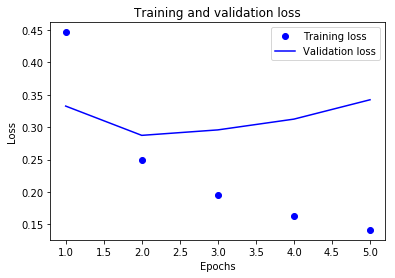

In [165]:
import matplotlib.pyplot as plt
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot (epochs, loss_values, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

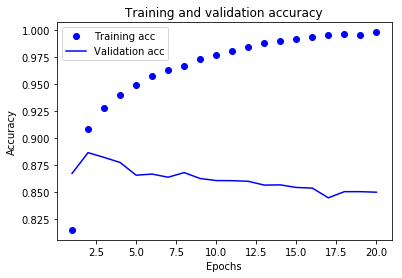

In [121]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot (epochs, acc_values, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

# Hyperparameter Search Algorithm

In [171]:
print ("training accuracy", history.history['acc'][-1])
print ("test accuracy", history.history['val_acc'][-1])
print ("training loss", history.history['loss'][-1])
print ("test loss", history.history['val_loss'][-1])

training accuracy 0.9490000001716614
test accuracy 0.8706999999046325
training loss 0.1416078120279312
test loss 0.34230101475715635


To start with, let's build an algorithm that trains a model for 10 epochs and varies a hyperparameter randomly between two start/end points. Let's just use the learning rate for now. We'll use a log uniform random distribution. We can do this quite easily just by rerunning the `model.compile` step.

In [172]:
from numpy import random

def search_learning_rate(model, 
                         num_models = 10): # how many different values of the lr to try
                                
        
    Wsave = model.get_weights() # to reinitialize the model
    
# search random values on a log scale to get learning rates
    exponent = (-3 * random.rand(num_models,1)) - 1 # exponent - search between 10^-4 and 10^-1
    learning_rates = 10 ** exponent # lr is a num_iterations x 1 vector
        
    # initialize vectors for validation loss
    val_loss = np.zeros ((num_models, 1))
    val_acc = np.zeros ((num_models, 1))
    
    for i in range (num_models):
        
        model.compile (optimizer=optimizers.RMSprop(lr = learning_rates[]), 
               loss = 'binary_crossentropy',
               metrics = ['acc'])
        
        # !!! remember to reinit the weights here!
        model.set_weights(Wsave)
        
        history = model.fit(x_train, y_train, 
                            verbose = 0,
                            epochs = 10, batch_size=512, 
                            validation_data=(x_dev, y_dev))
        val_loss[i] = history.history['val_loss'][-1]
        val_acc[i] = history.history['val_acc'][-1]
        print ("model", i, "done of", num_models)
    return (learning_rates, val_loss, val_acc)

In [ ]:
num_models = 50

results_lr, results_val_loss, results_val_acc = search_learning_rate(model, num_models)

print ("learning rates : validation loss : validation accuracy")
for i in range (num_models):
    print (results_lr[i], ":", results_val_loss[i], ":", results_val_acc[i])

model 0 done of 50
model 1 done of 50
model 2 done of 50
model 3 done of 50
model 4 done of 50
model 5 done of 50
model 6 done of 50
model 7 done of 50
model 8 done of 50
model 9 done of 50
model 10 done of 50
model 11 done of 50
model 12 done of 50
model 13 done of 50
model 14 done of 50
model 15 done of 50
model 16 done of 50
model 17 done of 50
model 18 done of 50
model 19 done of 50
model 20 done of 50
model 21 done of 50
model 22 done of 50
model 23 done of 50
model 24 done of 50
model 25 done of 50
model 26 done of 50
model 27 done of 50
model 28 done of 50
model 29 done of 50
model 30 done of 50
model 31 done of 50
model 32 done of 50
model 33 done of 50
model 34 done of 50
model 35 done of 50
model 36 done of 50
model 37 done of 50
model 38 done of 50
model 39 done of 50
model 40 done of 50
model 41 done of 50
model 42 done of 50
model 43 done of 50
model 44 done of 50
model 45 done of 50
model 46 done of 50


In [135]:
iterations = 10                                 # how many different values of the lr to try

# search random values on a log scale to get learning rates
exponent = (-3 * random.rand(iterations,1)) - 1 # exponent - search between 10^-4 and 10^-1
lr = 10 ** exponent 

In [139]:
print (val_loss)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
